In [10]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

from behavior_python.utils import parseStimpyLog

In [ ]:
animalid = 'KC144'
area = '*'
glob.glob(f'J:\\presentation\\*_{animalid}_detect_opto*_{area}*')

In [5]:
exp_name = '230831_KC145_detect_opto120_AL__no_cam_KC'
stimlog = [i for i in os.listdir(os.path.join('J:/presentation',exp_name)) if i.endswith('.stimlog')][0]
stimlog_path = os.path.join(os.path.join('J:/presentation',exp_name,stimlog))
stimlog_path

'J:/presentation\\230831_KC145_detect_opto120_AL__no_cam_KC\\run00_145525_10_detectionTaskOpto_0.04-0.16pd_8-0.5Hz_singleTarget_raisedCosMasked_different_contrasts.stimlog'

In [7]:
data_dict,_ = parseStimpyLog(stimlog_path)

[23-10-19 22:30:27] - Parsing stimlog...


Reading logs : 100%|██████████| 2/2 [00:00<00:00, 117.22it/s]


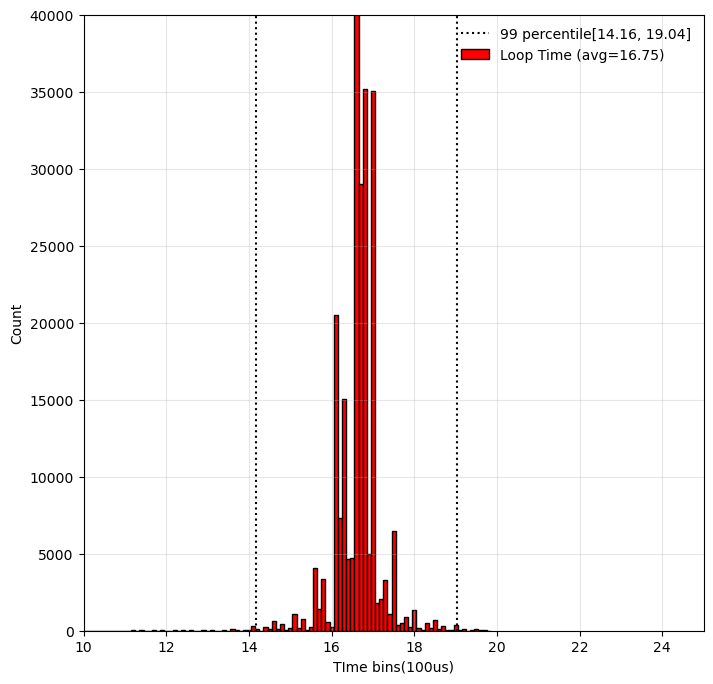

In [11]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)

vstim_time = data_dict['vstim']['presentTime'].to_list()
vstim_time_diff = np.diff(vstim_time)

vstim_time_diff *= 1000

std = np.std(vstim_time_diff)

# outside_data = vstim_time_diff[np.where((vstim_time_diff >= np.mean(vstim_time_diff) - 3*std) & (vstim_time_diff <= np.mean(vstim_time_diff)+3*std))]
low_,high_ = np.percentile(vstim_time_diff, [0.5, 99.5])

bins = np.arange(10,20,0.1)
h1,bin_edges = np.histogram(vstim_time_diff,bins)


ax.bar(bin_edges[:-1],h1,width=0.1,color='r',label=f'Loop Time (avg={round(np.mean(vstim_time_diff),2)})',linewidth=1,edgecolor='k')
ax.axvline(low_,color='k',linestyle=':',label=f'99 percentile{[round(low_,2),round(high_,2)]}')
ax.axvline(high_,color='k',linestyle=':')

# ax.text(0,1000,f"Avg. {np.mean(vstim_time_diff)}\n99.5% {round(np.mean(vstim_time_diff) - std,2)}s, {round(np.mean(vstim_time_diff) + std,2)}")
ax.set_xlim([10,25])
ax.set_ylim([0,40000])
ax.set_ylabel('Count')
ax.set_xlabel('TIme bins(100us)')
ax.legend(frameon=False)
ax.grid(alpha=0.3)